epsilon    0.108679
w_I        0.001641
wA         0.004814
w_v        0.001582
w          0.007034
Name: 381, dtype: float64


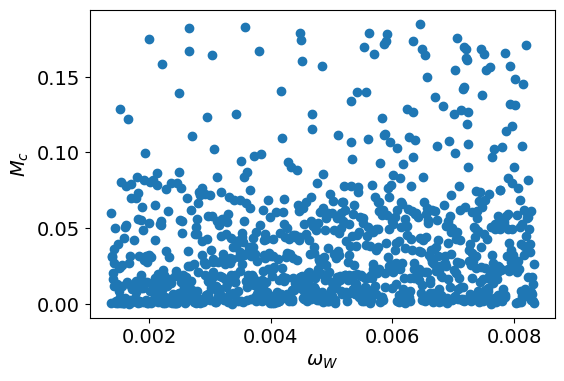

[0.00528199 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604
 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604
 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604
 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604
 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604
 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604
 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604 0.00532604
 0.00659426 0.00659426 0.00659426 0.00659426 0.00659426 0.00659426
 0.00659426 0.00659426 0.00659426 0.00659426 0.00659426 0.00659426
 0.00659426 0.00659426 0.00659426 0.00659426 0.00659426 0.00659426
 0.00659426 0.00659426 0.00659426 0.00659426 0.00659426 0.00292609
 0.00292609 0.00140492 0.00140492 0.00140492 0.00140492 0.00140492
 0.00140492 0.00140492 0.00140492 0.00140492 0.00140492 0.00140492
 0.00140492 0.00140492 0.00140492 0.00140492 0.00140492 0.00140492
 0.00140492 0.00140492 0.00140492 0.00140492 0.00140492 0.0014

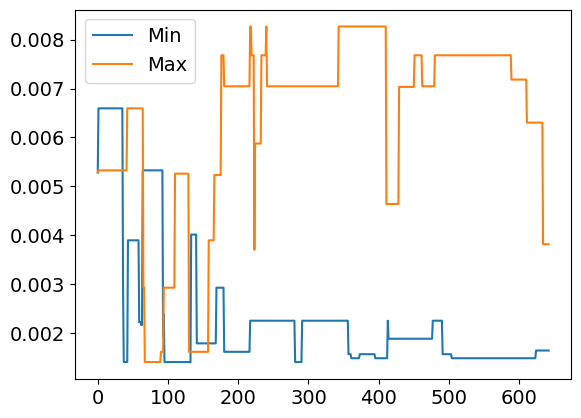

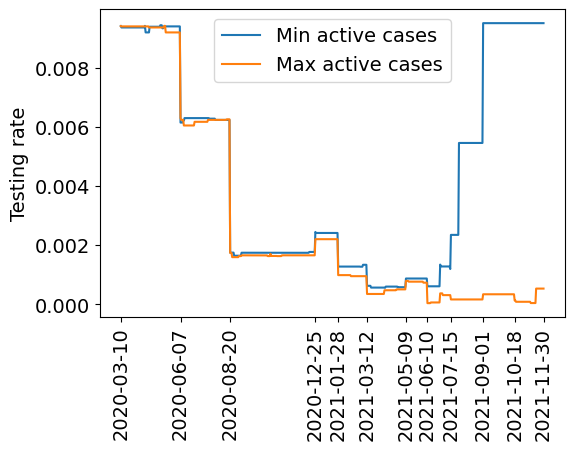

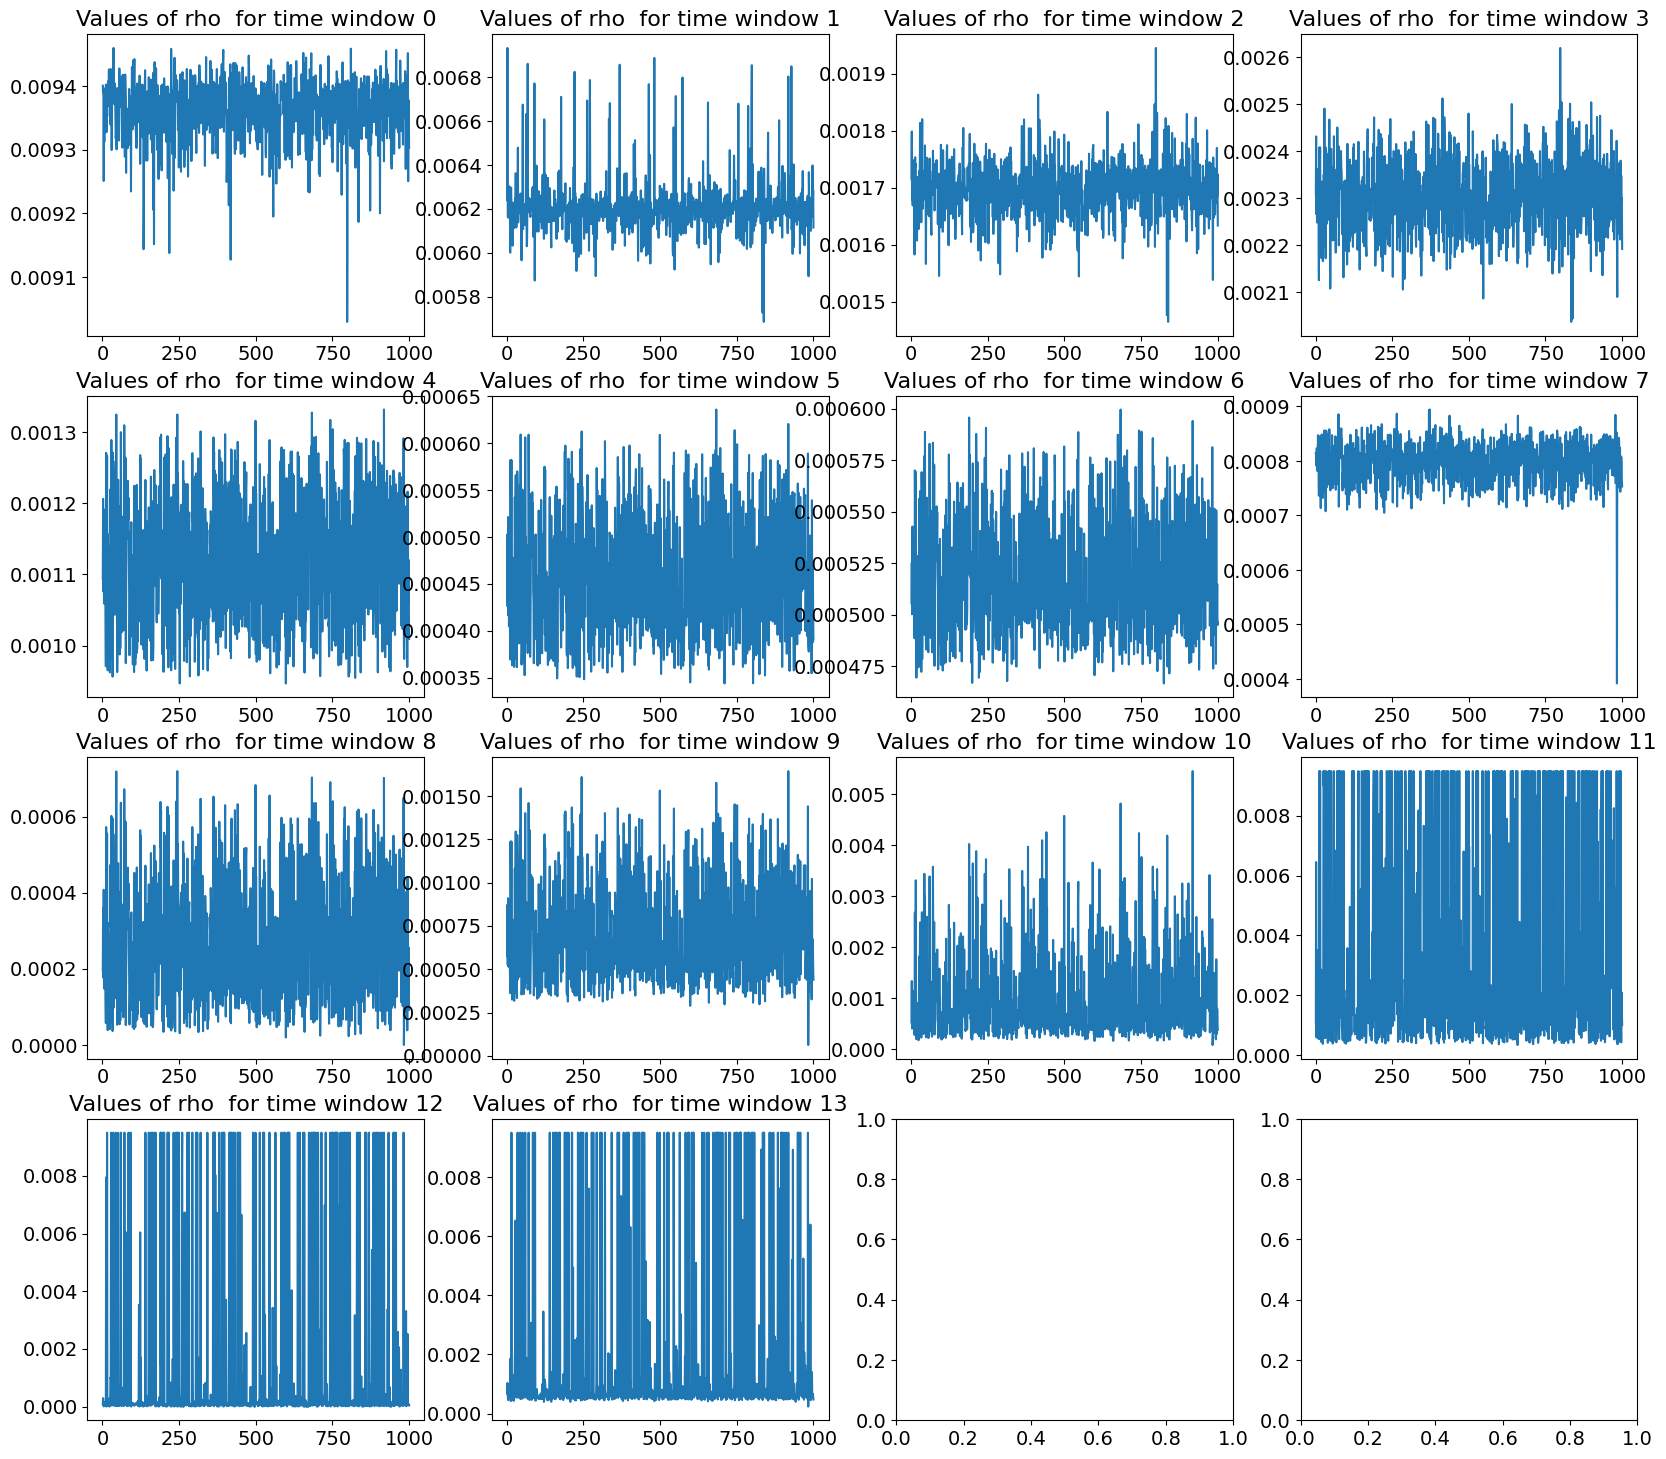

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.dates as mdates 
import pandas as pd 

#In this file we analyse the results from the sensitivity analysis

times = pd.date_range(start='03/10/2020', end='11/30/2021') 
plt.rcParams.update({'font.size': 14})
my_times = [times[0], times[89], times[163], times[290],  times[324],  times[367],
            times[425],  times[457],  times[492], times[540], times[587],  times[630]]
Kcf = np.zeros((1001,14))
Mcf = np.zeros((1001,14))
rhof = np.zeros((1001,14))
pcf=np.zeros((1001,14))
df = pd.read_csv('waning.csv')
df = df.set_index('ind')

w_a1 = df['w_I']
w_a = np.array(w_a1)
time_windows=  [0,89,163,290,324,367,393,425,457,476,492,540,587,619, 643] 

def load_param(n1,n2):
    for i in range(n1,n2):
    
        sf = i
        file1 = "data_sen_2/Kc_%d.npy" %(sf)
        file2 = "data_sen_2/MC_%d.npy" %(sf)
        file3 = "data_sen_2/rhoc_%d.npy" %(sf)
        file4 = "data_sen_2/pc_%d.npy" %(sf)


        Kc = np.load( file1)  
        Mc = np.load(file2)  
        rho = np.load(file3)  
        pc = np.load( file4)
        
        Kcf[i] = Kc ; Mcf[i] = Mc ; rhof[i] = rho ; pcf[i] = pc
    
    
load_param(1,1001)



Kcf = np.delete(Kcf,0,0) 
Mcf = np.delete(Mcf,0,0)
rhof = np.delete(rhof,0,0)#
pcf = np.delete(pcf,0,0) 

fig, ax = plt.subplots(1,figsize=(6,4))
plt.scatter(w_a,Mcf[:,11])
plt.xlabel(r'$\omega_W$',fontsize=14)
plt.ylabel(r'$M_c$',fontsize=14)
plt.savefig('paper_plots/mc_w_scatter.png',bbox_inches="tight")
plt.show()

ind_min = np.load('data_sen/min_ind.npy')
ind_max = np.load('data_sen/max_ind.npy') 

min_q = np.zeros(643) ; max_q = np.zeros(643)
con_q = w_a

for i in range(643):
    ind_mn = int(ind_min[i])
    ind_mx = int(ind_max[i])
    
    min_q[i] = con_q[ind_mn]
    max_q[i] = con_q[ind_mx]


print(max_q)
plt.plot(np.arange(0,643),min_q, label = 'Min')
plt.plot(np.arange(0,643),max_q, label = 'Max')
plt.legend()
plt.show()


def time_w(t1,t2,k,con_q):
    
    min_qp = np.zeros(643) ; max_qp = np.zeros(643)
    
    for i in range(t1,t2):
        ind_mn = int(ind_min[i])
        ind_mx = int(ind_max[i])
        
        min_qp[i] = con_q[ind_mn,k]
        max_qp[i] = con_q[ind_mx,k]
    
    return min_qp[t1:t2],max_qp[t1:t2]
param_min = np.zeros(643)
param_max = np.zeros(643)

for m in range(14):
    t1 = time_windows[m] ; t2 = time_windows[m+1]
    
    param_min[t1:t2] = time_w(t1,t2,m,rhof)[0]
    param_max[t1:t2] = time_w(t1,t2,m,rhof)[1]
 

Tf = 631
fig, ax = plt.subplots(1,figsize=(6,4))
plt.plot(times,param_min[0:Tf], label = 'Min active cases')
plt.plot(times,param_max[0:Tf], label = 'Max active cases')
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xticks(my_times)
plt.ylabel('Testing rate', fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.savefig('paper_plots/rho_sen.png', bbox_inches="tight")
plt.show()



fig, axes = plt.subplots(4, 4, figsize=(20,18), sharey=False)

for j in range(4):
    for i in range(4):
        k = 4*j +i
        if k<=13:
            axes[j,i].plot(np.arange(1,1001), rhof[:,k])
            axes[j,i].set_title("Values of rho  for time window " + str(k), fontsize=16)
 
plt.savefig('sensitivity/rho.png')   
plt.show()